In [9]:
# Get stocks data
import yfinance as yf
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Open and read the stock file
with open("stock.txt", "r") as file:
    # Read the contents and split by comma
    stocks = file.read().strip().split(",")

print("Stocks list:", stocks)

Stocks list: ['MSFT', 'AAPL', 'GOOG']


#### After importing necessary libraries, we will check the dataframes and see how the values are for Microsoft Stock (MSFT).

In [ ]:
# EDA - Microsoft
msft = yf.Ticker("MSFT")
hist = msft.history(period = "2y")
fin = msft.financials
act = msft.actions
display(hist.tail(), fin.head(), act.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-08 00:00:00-05:00,425.320007,426.500000,421.779999,422.540009,16891400,0.0,0.0
2024-11-11 00:00:00-05:00,422.519989,424.809998,416.000000,418.010010,24503300,0.0,0.0
2024-11-12 00:00:00-05:00,418.250000,424.440002,417.200012,423.029999,19401200,0.0,0.0
2024-11-13 00:00:00-05:00,421.640015,429.329987,418.209991,425.200012,21502200,0.0,0.0
2024-11-14 00:00:00-05:00,424.799988,428.160004,420.000000,426.890015,29483635,0.0,0.0


,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Tax Effect Of Unusual Items,-99918000.0,-2850000.0,43754000.0,180160797.164637
Tax Rate For Calcs,0.182,0.19,0.131,0.138266
Normalized EBITDA,133558000000.0,105155000000.0,99905000000.0,83831000000.0
Total Unusual Items,-549000000.0,-15000000.0,334000000.0,1303000000.0
Total Unusual Items Excluding Goodwill,-549000000.0,-15000000.0,334000000.0,1303000000.0


,Dividends,Stock Splits
Date,,
2023-08-16 00:00:00-04:00,0.68,0.0
2023-11-15 00:00:00-05:00,0.75,0.0
2024-02-14 00:00:00-05:00,0.75,0.0
2024-05-15 00:00:00-04:00,0.75,0.0
2024-08-15 00:00:00-04:00,0.75,0.0


#### Next up, we will graph out how MSFT Stock prices and trades fluctuate over a year.

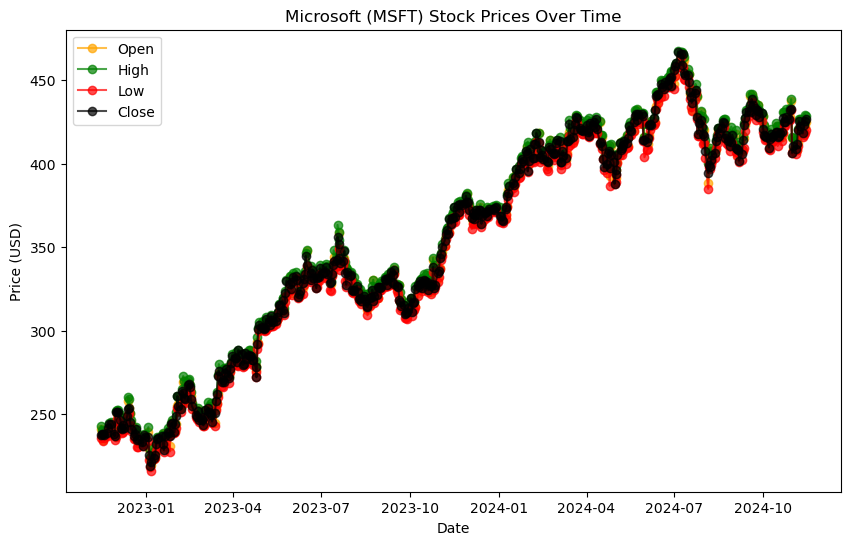

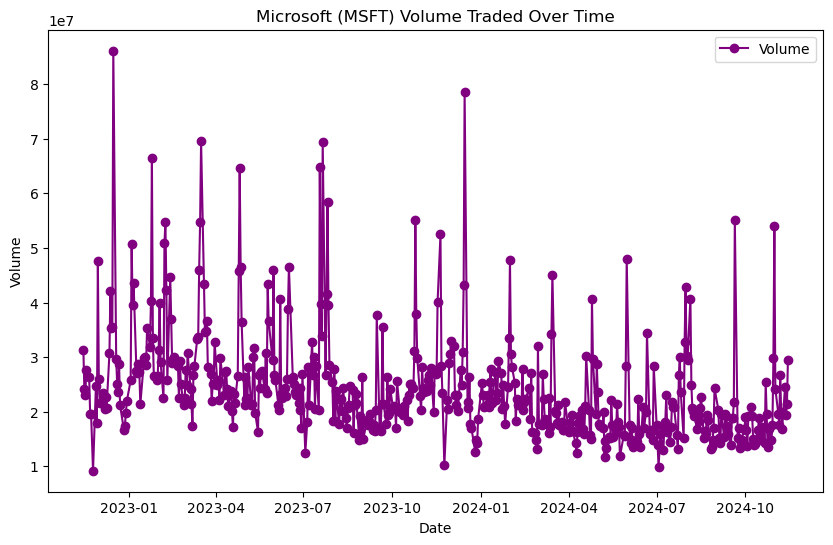

In [ ]:
# Plot 1: Open vs Close
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist["Open"], label="Open", marker='o', linestyle='-', alpha = 0.7, color = "orange")
plt.plot(hist.index, hist["High"], label="High", marker='o', linestyle='-', alpha = 0.7, color = "green")
plt.plot(hist.index, hist["Low"], label="Low", marker='o', linestyle='-', alpha = 0.7, color = "red")
plt.plot(hist.index, hist["Close"], label="Close", marker='o', linestyle='-', alpha = 0.7, color = "black")


plt.title("Microsoft (MSFT) Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Plot 2: Volume Traded Over Time
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist["Volume"], label="Volume", color='purple', marker='o', linestyle='-')
plt.title("Microsoft (MSFT) Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

#### As we can see, the prices fluctuate a lot so building a preditction model would be the most suitable option. To train a model, we will need to know the predictors with the most correlations so we will make a heat map.

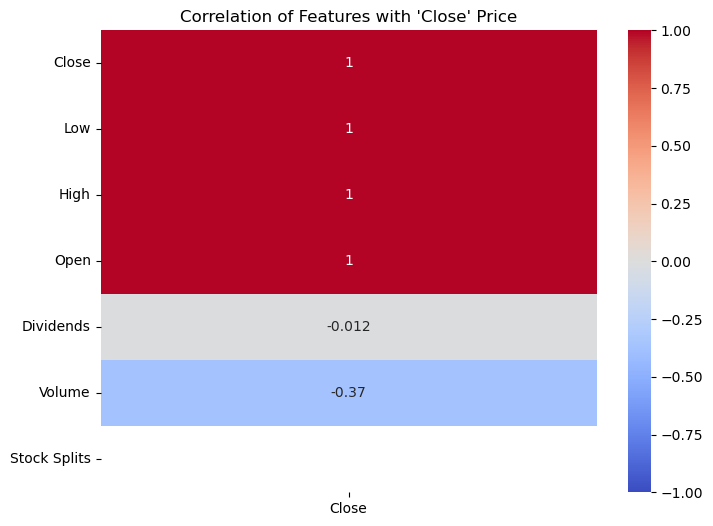

In [8]:
# Calculating the correlation matrix
correlation_matrix = hist.corr()

# Focusing on correlations with the 'Close' feature
close_corr = correlation_matrix[['Close']].sort_values(by='Close', ascending=False)

# Plotting the correlation of each feature with 'Close'
plt.figure(figsize=(8, 6))
sns.heatmap(close_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with 'Close' Price")
plt.show()

#### Based on the graph, dividends, stock splits have very low impact to stock price so we can consider it as outlier and drop the column to more effectively train the model. 

In [12]:
# Google
goog = yf.Ticker("GOOG")
hist_gg = goog.history(period = "2y")
fin_gg = goog.financials
act_gg = goog.actions
display(hist_gg.tail(), fin_gg.head(), act_gg.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-08 00:00:00-05:00,182.000000,182.350006,179.570007,179.860001,15021500,0.0,0.0
2024-11-11 00:00:00-05:00,180.070007,182.085007,179.990005,181.970001,12503400,0.0,0.0
2024-11-12 00:00:00-05:00,181.380005,184.024994,180.990005,183.320007,14065800,0.0,0.0
2024-11-13 00:00:00-05:00,182.149994,182.615005,180.119995,180.490005,13969700,0.0,0.0
2024-11-14 00:00:00-05:00,179.820007,180.445007,176.029999,177.350006,16716910,0.0,0.0


,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,-286479000.0,-981507000.0,1948860000.0,970572126.783412,NaN
Tax Rate For Calcs,0.139,0.159,0.162,0.162493,NaN
Normalized EBITDA,100032000000.0,91333000000.0,91491000000.0,55941000000.0,NaN
Total Unusual Items,-2061000000.0,-6173000000.0,12030000000.0,5973000000.0,NaN
Total Unusual Items Excluding Goodwill,-2061000000.0,-6173000000.0,12030000000.0,5973000000.0,NaN


,Dividends,Stock Splits
Date,,
2024-06-10 00:00:00-04:00,0.2,0.0
2024-09-09 00:00:00-04:00,0.2,0.0


AttributeError: module 'yfinance.ticker' has no attribute 'actions'